###**Objective:**
predict whether the audience will click on an ad or not and thus help the marketing team answer ad placement-related questions

In online advertising,**CTR** is a very important metric for evaluating ad performance. CTR prediction systems are thus essential and widely used for sponsored search and real-time bidding.

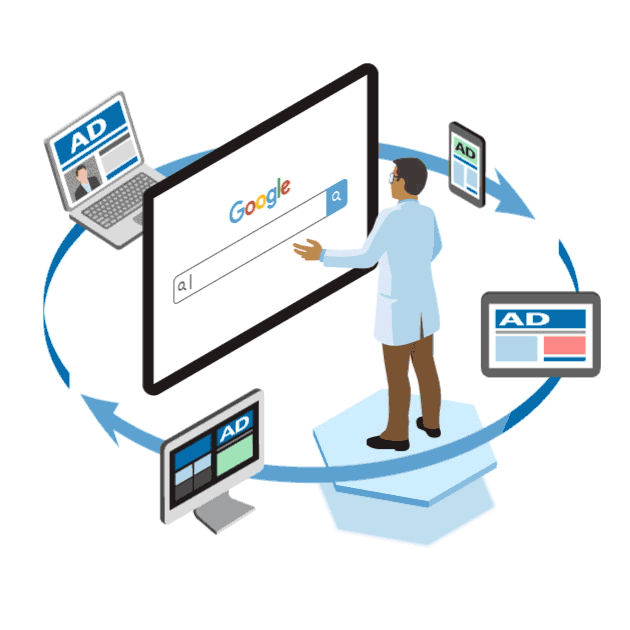

The data set has 99,999 rows and 27 columns.

###**DataSet Descriptions:**

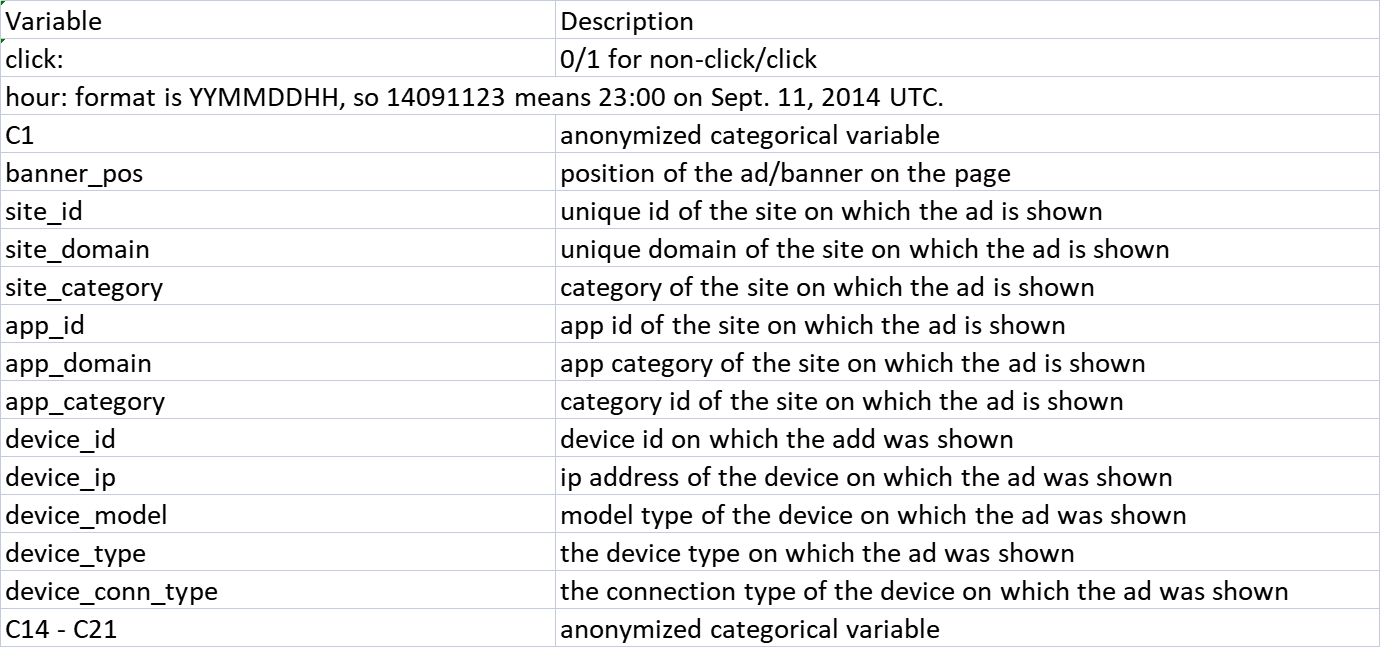

####**Connect With google drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


####**Import Libraries**

In [2]:
!pip3 install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 4.4 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import math
import scipy
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
import datetime
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn import metrics
import category_encoders as ce
pd.options.display.float_format = '{:.2f}'.format

In [4]:
clickthrRate=pd.read_csv("drive/MyDrive/Clickthrough_Rate_prediction/data.csv")
clickthrRate.shape

(99999, 27)

#####Exploratory Data Analysis

In [5]:
clickthrRate.head()

,click,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,...,C17,C18,C19,C20,C21,month,dayofweek,day,hour,y
0,False,1005,1,856e6d3f,58a89a43,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,...,2528,0,39,100075,221,10,1,28,14,0
1,True,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,...,1934,2,39,-1,16,10,2,22,19,1
2,False,1005,0,e3c09f3a,d262cf1e,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,...,2552,3,167,100202,23,10,3,23,18,0
3,False,1002,0,0da94452,248e439f,50e219e0,ecad2386,7801e8d9,07d7df22,0fa578fd,...,2478,3,167,100074,23,10,2,22,19,0
4,True,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,...,1722,0,35,-1,79,10,1,21,8,1


In [6]:
###Data set columns info
clickthrRate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   click             99999 non-null  bool  
 1   C1                99999 non-null  int64 
 2   banner_pos        99999 non-null  int64 
 3   site_id           99999 non-null  object
 4   site_domain       99999 non-null  object
 5   site_category     99999 non-null  object
 6   app_id            99999 non-null  object
 7   app_domain        99999 non-null  object
 8   app_category      99999 non-null  object
 9   device_id         99999 non-null  object
 10  device_ip         99999 non-null  object
 11  device_model      99999 non-null  object
 12  device_type       99999 non-null  int64 
 13  device_conn_type  99999 non-null  int64 
 14  C14               99999 non-null  int64 
 15  C15               99999 non-null  int64 
 16  C16               99999 non-null  int64 
 17  C17         

In this data set, there are three data types of variable found. It's also shows that there is no missing data.

In [7]:
####stastical info of data set
clickthrRate.describe()

,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,month,dayofweek,day,hour,y
count,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00
mean,1004.97,0.29,1.02,0.33,18857.23,318.83,60.28,2114.61,1.44,227.23,53292.00,83.16,10.00,2.59,25.49,11.30,0.17
std,1.09,0.51,0.53,0.85,4944.92,21.51,47.71,607.47,1.33,351.47,49952.34,70.16,0.00,1.72,2.97,5.94,0.38
min,1001.00,0.00,0.00,0.00,375.00,120.00,20.00,112.00,0.00,33.00,-1.00,1.00,10.00,0.00,21.00,0.00,0.00
25%,1005.00,0.00,1.00,0.00,16920.00,320.00,50.00,1863.00,0.00,35.00,-1.00,23.00,10.00,1.00,23.00,7.00,0.00
50%,1005.00,0.00,1.00,0.00,20346.00,320.00,50.00,2323.00,2.00,39.00,100050.00,61.00,10.00,2.00,26.00,11.00,0.00
75%,1005.00,1.00,1.00,0.00,21893.00,320.00,50.00,2526.00,3.00,171.00,100093.00,101.00,10.00,4.00,28.00,16.00,0.00
max,1012.00,7.00,5.00,5.00,24043.00,1024.00,1024.00,2757.00,3.00,1839.00,100248.00,255.00,10.00,6.00,30.00,23.00,1.00


In [8]:
### number of click
clickthrRate["click"].value_counts()

False    83019
True     16980
Name: click, dtype: int64

Distribution of click is shows that dataset is imbalanced.

In [9]:
###convert boolean into integer by using labelencoder
label_encoder = preprocessing.LabelEncoder()
clickthrRate["click"]=label_encoder.fit_transform(clickthrRate["click"])
clickthrRate["click"].unique()

array([0, 1])

In [10]:
#### distribution of y
clickthrRate["y"].value_counts()

0    83019
1    16980
Name: y, dtype: int64

In [11]:
###check the duplicate column and drop it 
train= clickthrRate.loc[:,~clickthrRate.apply(lambda x: x.duplicated(),axis=1).all()].copy()
train.columns

Index(['click', 'C1', 'banner_pos', 'site_id', 'site_domain', 'site_category',
       'app_id', 'app_domain', 'app_category', 'device_id', 'device_ip',
       'device_model', 'device_type', 'device_conn_type', 'C14', 'C15', 'C16',
       'C17', 'C18', 'C19', 'C20', 'C21', 'month', 'dayofweek', 'day', 'hour'],
      dtype='object')

In [12]:
train.shape

(99999, 26)

Here We can see that shape of dataset has changed . Earlier shape of dataset has 27 colummns. now it's dataset has 26 columns. drop the columns y(int64) from data set. 

In [13]:
###check site id is unique or not
chk_site=train['site_id']
is_duplicate = chk_site.duplicated()
sum(is_duplicate)

98514

In [14]:
###check number duplicated rows
if (duplicated := train.duplicated(keep=False)).any():
    some_duplicates = train[duplicated].sort_values(by=train.columns.to_list()).value_counts().sum()
    print(f"Dataset has one or more duplicated rows:\n{some_duplicates}")

Dataset has one or more duplicated rows:
1231


In [15]:
###drop the duplicated rows
train=train.drop_duplicates()
train.shape

(99341, 26)

Now, here we can see that every columns has contains duplicated rows. So that, none of column has unique column.

0   0.83
1   0.17
Name: click, dtype: float64




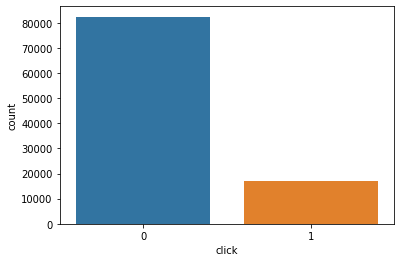

In [16]:
print(train.click.value_counts(normalize = True))
print("\n")
plt.figure()
sns.countplot(x='click', data=train)
plt.show()

In [17]:
### separation of numerical and categorical vaiable
numerical = []
categorical = []

for col in (train.columns):
    if train[col].dtype == "object":
        categorical.append(col)
    else:
        numerical.append(col)
print("numerical columns = ",numerical)
print("\ncategorical columns = ",categorical)

numerical columns =  ['click', 'C1', 'banner_pos', 'device_type', 'device_conn_type', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'month', 'dayofweek', 'day', 'hour']

categorical columns =  ['site_id', 'site_domain', 'site_category', 'app_id', 'app_domain', 'app_category', 'device_id', 'device_ip', 'device_model']


In [18]:
train.describe()

,click,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,month,dayofweek,day,hour
count,99341.00,99341.00,99341.00,99341.00,99341.00,99341.00,99341.00,99341.00,99341.00,99341.00,99341.00,99341.00,99341.00,99341.00,99341.00,99341.00,99341.00
mean,0.17,1004.97,0.29,1.02,0.33,18846.56,318.83,60.34,2113.23,1.44,226.06,53294.20,82.95,10.00,2.59,25.48,11.31
std,0.38,1.09,0.51,0.53,0.86,4942.64,21.58,47.85,607.16,1.33,350.39,49952.11,70.05,0.00,1.73,2.97,5.94
min,0.00,1001.00,0.00,0.00,0.00,375.00,120.00,20.00,112.00,0.00,33.00,-1.00,1.00,10.00,0.00,21.00,0.00
25%,0.00,1005.00,0.00,1.00,0.00,16920.00,320.00,50.00,1863.00,0.00,35.00,-1.00,23.00,10.00,1.00,23.00,7.00
50%,0.00,1005.00,0.00,1.00,0.00,20346.00,320.00,50.00,2323.00,2.00,39.00,100050.00,61.00,10.00,2.00,26.00,11.00
75%,0.00,1005.00,1.00,1.00,0.00,21893.00,320.00,50.00,2526.00,3.00,171.00,100084.00,100.00,10.00,4.00,28.00,16.00
max,1.00,1012.00,7.00,5.00,5.00,24043.00,1024.00,1024.00,2757.00,3.00,1839.00,100248.00,255.00,10.00,6.00,30.00,23.00


#####**Analyzing of numerical feature**

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

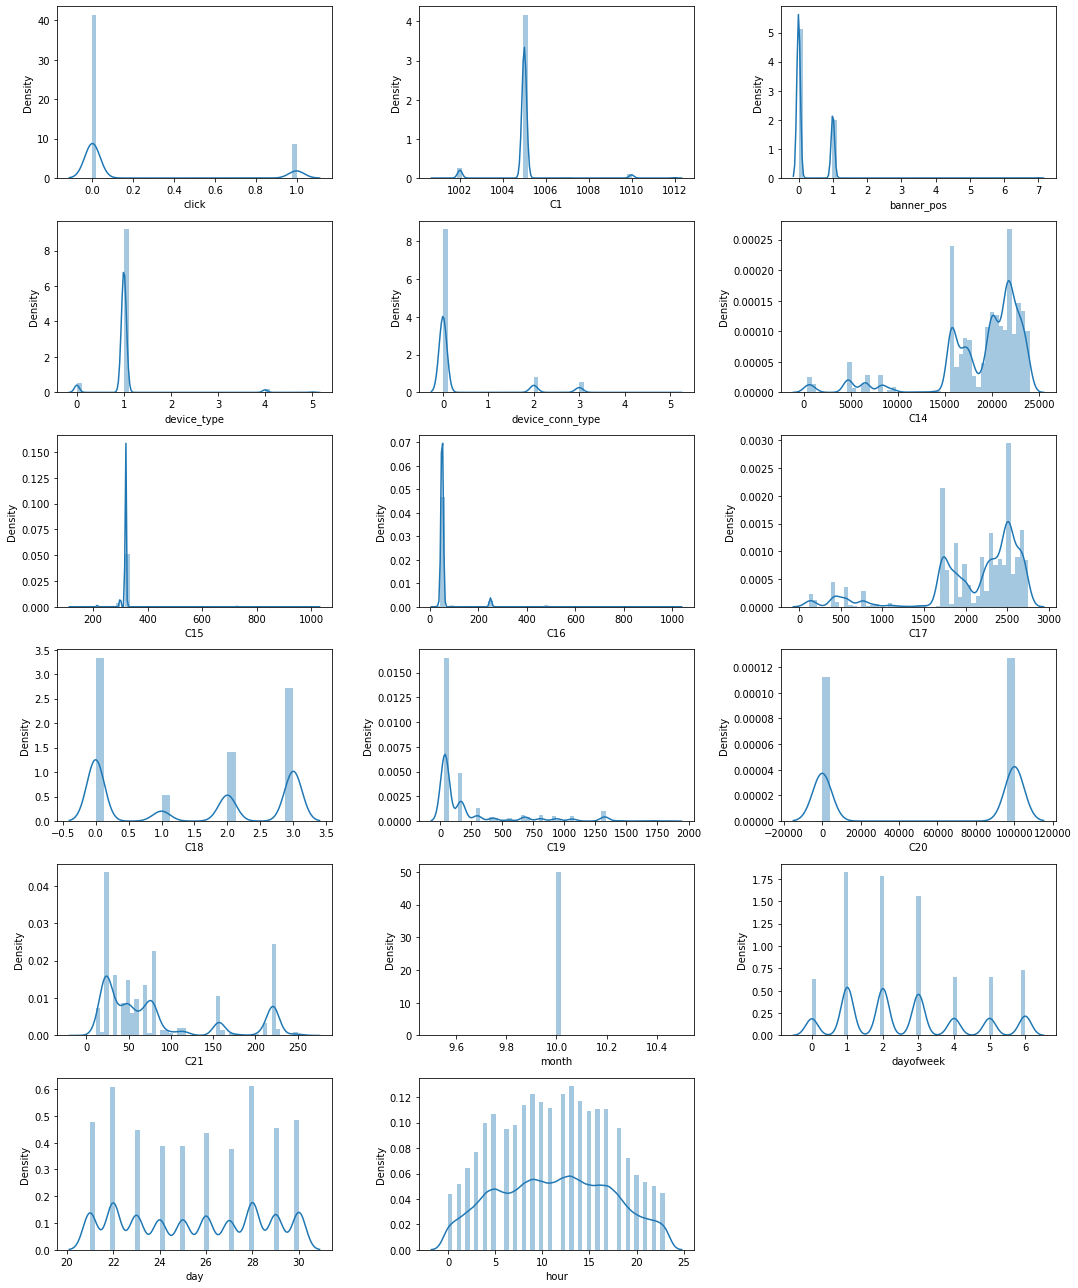

In [19]:
# The code below will plot histograms for all numerical columns 

n = 3
plt.figure(figsize=[15,3*math.ceil(len(numerical)/n)])

for i in range(len(numerical)):
    plt.subplot(math.ceil(len(numerical)/n),n,i+1)
    sns.distplot(train[numerical[i]])

plt.tight_layout()
plt.show()

**observation of numerical features**


1.   month column has only 1 data entry, no exrtra information is added, can be dropped
2.  banner pos, device conn, C20, C15, C16 looks like data is cenetered around certain values.



Text(0.5, 1.05, 'Pearson correlation of Features before outlier removing')

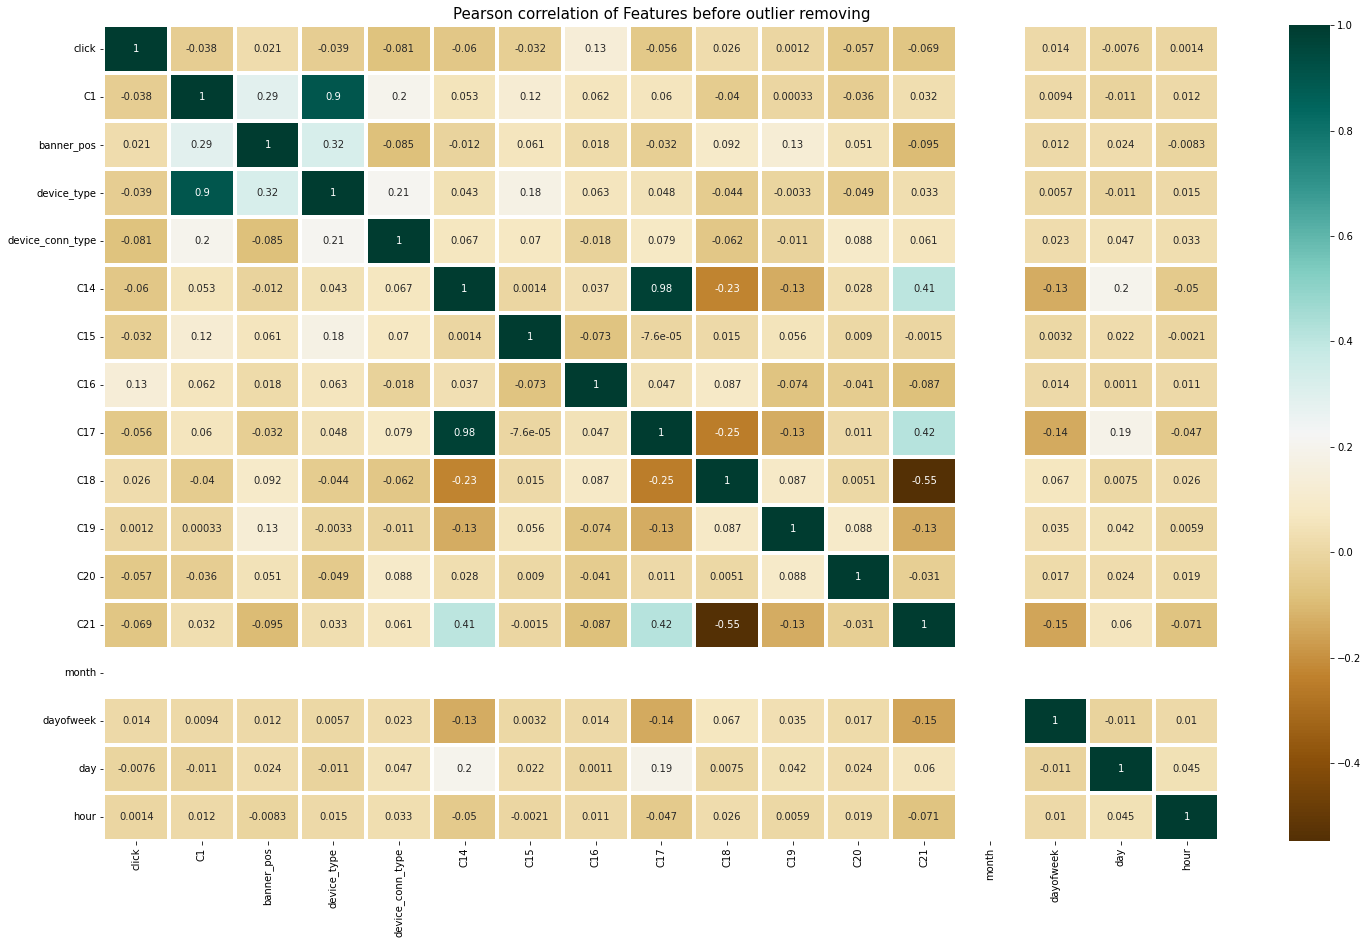

In [20]:
# Pearson correlation table to find the relationship with output with all input features. 

corr = train.corr()
f, ax = plt.subplots(figsize=(25,15))
sns.heatmap(corr, ax=ax, annot=True,linewidths=3,cmap='BrBG')
plt.title("Pearson correlation of Features before outlier removing", y=1.05, size=15)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

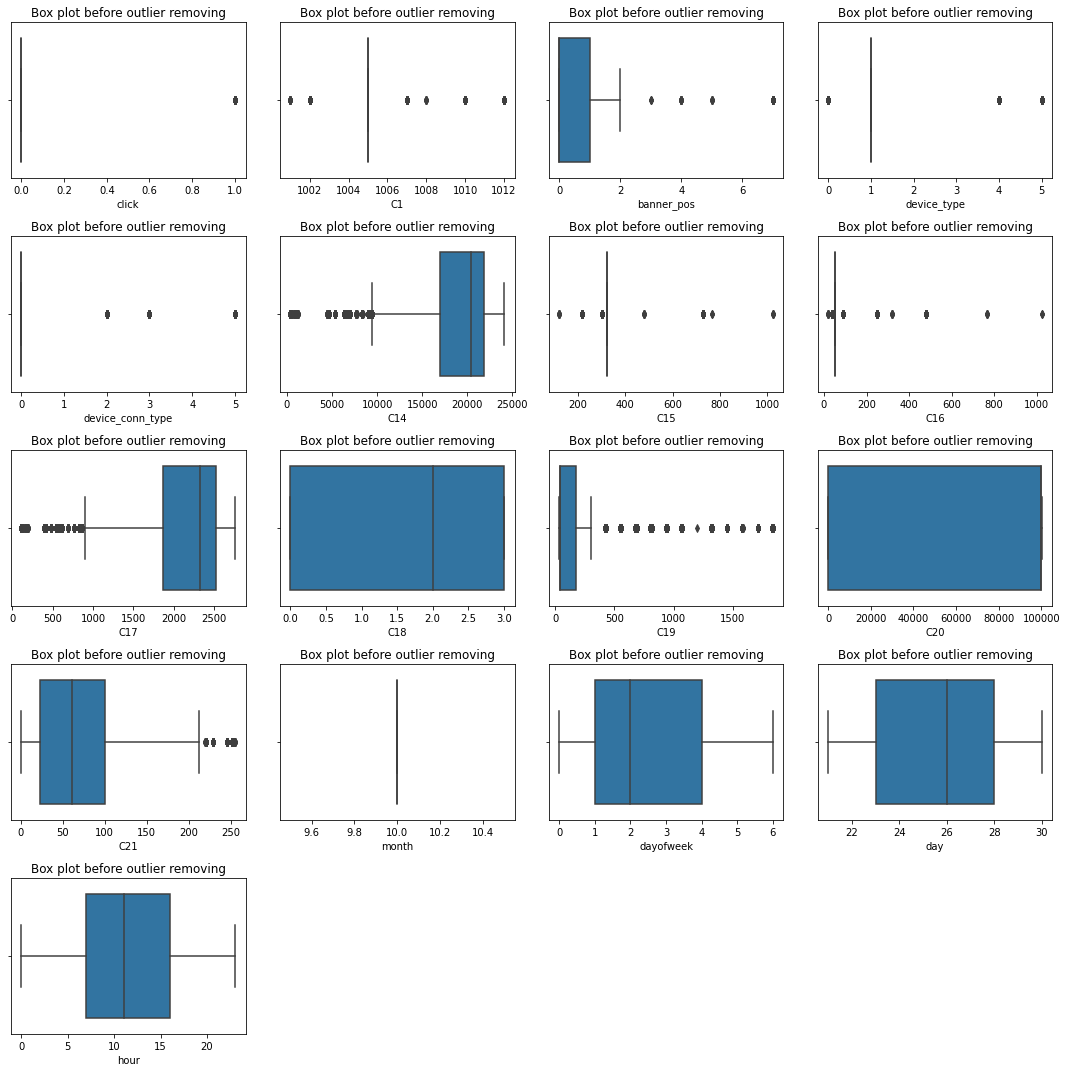

In [21]:
n = 4
plt.figure(figsize=[15,3*math.ceil(len(numerical)/n)])

for i in range(len(numerical)):
    plt.subplot(math.ceil(len(numerical)/n),n,i+1)
    sns.boxplot(train[numerical[i]])
    plt.title("Box plot before outlier removing")    

plt.tight_layout()
plt.show()

Above box plot , shows that in numerical data type, where banner_pos, deviceType, C1, device_conn_type,C14,C15,C16,C17,C19 and C21 column have outlier. 

In [22]:
###count the value of banner pos
outlier_feature=['banner_pos','device_type','C1','device_conn_type','C14','C15','C16','C17','C19', 'C21']
for feature in outlier_feature:
  print(f"Count value of {feature} \n",train[feature].value_counts())
  print(f"Normalise value of {feature}\n",train[feature].value_counts(normalize = True))

Count value of banner_pos 
 0    71284
1    27888
7      107
2       30
4       19
5        9
3        4
Name: banner_pos, dtype: int64
Normalise value of banner_pos
 0   0.72
1   0.28
7   0.00
2   0.00
4   0.00
5   0.00
3   0.00
Name: banner_pos, dtype: float64
Count value of device_type 
 1    91589
0     5489
4     1928
5      335
Name: device_type, dtype: int64
Normalise value of device_type
 1   0.92
0   0.06
4   0.02
5   0.00
Name: device_type, dtype: float64
Count value of C1 
 1005    91213
1002     5489
1010     2263
1012      253
1007       93
1001       21
1008        9
Name: C1, dtype: int64
Normalise value of C1
 1005   0.92
1002   0.06
1010   0.02
1012   0.00
1007   0.00
1001   0.00
1008   0.00
Name: C1, dtype: float64
Count value of device_conn_type 
 0    85872
2     7932
3     5422
5      115
Name: device_conn_type, dtype: int64
Normalise value of device_conn_type
 0   0.86
2   0.08
3   0.05
5   0.00
Name: device_conn_type, dtype: float64
Count value of C14 
 4687     

**Above observation shows after removing of duplicate rows in dataset**

*   in device_type feature of dataset's contains 92% rows mapped has 1 and remaining rows contain 0,4,5. less number of rows contains 5 in this feature. 
*   in device_conn_type feature dataset's contains 86% rows have 0 and remaining rows contain 2,3,5.


*   in banner_pos feature of dataset's contains 71% rows have  0, 28% rows have 1 and remaining rows contains 2,7,3,4,5. less number of rows contains 3 in this feature. 
*   in C1 feature of dataset's contains 91% rows have  1005 and remaining rows contains 1002,1010,1012,1007,1001,1008. less number of rows contains 1008 in this feature.  


*   in C15 feature of dataset's contains 93% rows have  320 and remaining rows contains 300,216,728,120,480,1024.768. less number of rows contains 768 in this feature. 
*   in C16 feature of dataset's contains 94% rows have  50 and remaining rows contains 250,36,480,90,20,320,768,1024. less number of rows contains 1024 in this feature. 



Remaining features have so many outlier points, so that we have to deal with this outlier. except click feature of dataset contains two values. so that we are not working on outlier. 


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


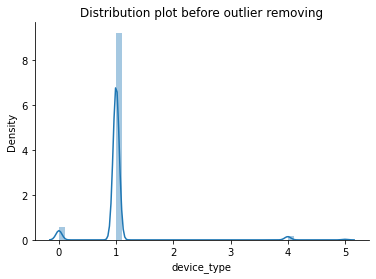

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


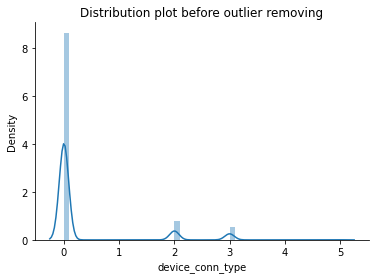

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


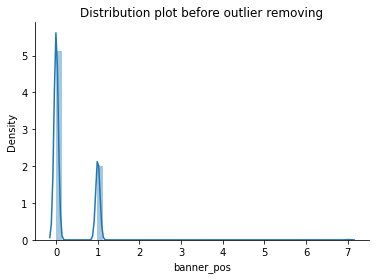

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


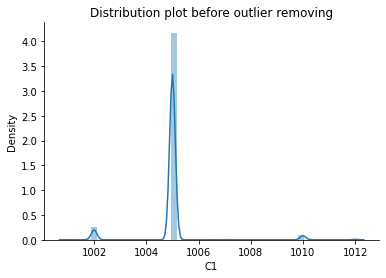

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


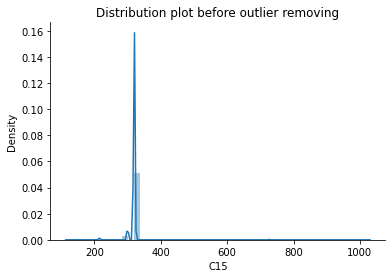

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


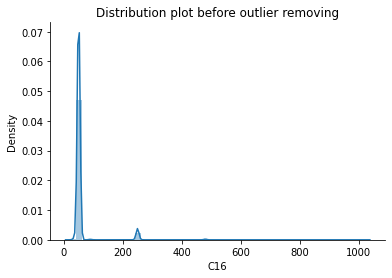

In [23]:
##Dealing with outlier contain in C1 feature
less_outlier=['device_type','device_conn_type','banner_pos','C1','C15','C16']
for col in less_outlier:
    sns.distplot(train[col])
    plt.title("Distribution plot before outlier removing")
    sns.despine()
    plt.show()

Above plot distribution shows that 'device_type','device_conn_type','banner_pos','C1','C15','C16'. most feature concentrated at almost one value.except banner_pos feature. Distplot of banner_pos shows that it has two spike distribution. 

Let's deal with outlier removal of banner_pos feature in dataset.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


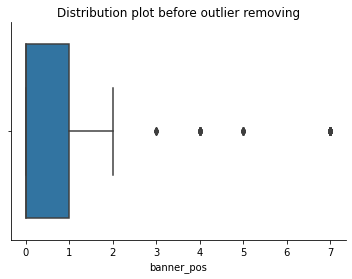

In [24]:
from scipy.stats.stats import iqr
sns.boxplot(train['banner_pos'])
plt.title("Distribution plot before outlier removing")
sns.despine()
plt.show()


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


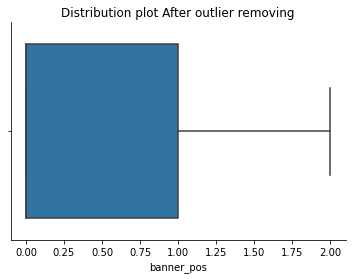

In [25]:
###Removing outlier by using median imputations
for i in train['banner_pos']:
  q1=train['banner_pos'].quantile(0.25)
  q3=train['banner_pos'].quantile(0.75)
  iqr=q3-q1
  lower_tail=q1-1.5*iqr
  upper_tail=q3+1.5*iqr
  if i<lower_tail or i>upper_tail:
      train['banner_pos']=train['banner_pos'].replace(i,np.median(train['banner_pos']))
sns.boxplot(train['banner_pos'])
plt.title("Distribution plot After outlier removing")
sns.despine()
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


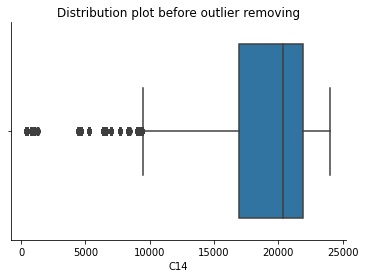

In [26]:
###Dealing the outlier with feature C14
from scipy.stats.stats import iqr
sns.boxplot(train['C14'])
plt.title("Distribution plot before outlier removing")
sns.despine()
plt.show()


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


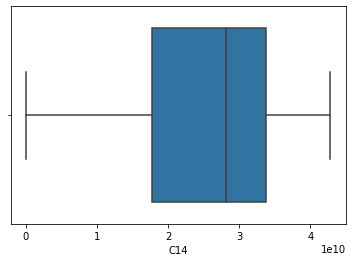

In [27]:
#####Remove the outlier by using box-transformation
train['C14'],fitted_lambda=scipy.stats.boxcox(train['C14'],lmbda=None)
sns.boxplot(train['C14'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


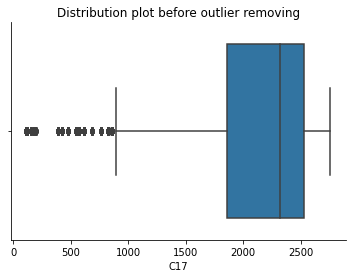

In [28]:
###Dealing the outlier with feature C17
from scipy.stats.stats import iqr
sns.boxplot(train['C17'])
plt.title("Distribution plot before outlier removing")
sns.despine()
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


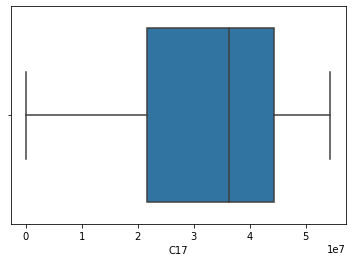

In [29]:
#####Remove the outlier by using box-transformation
train['C17'],fitted_lambda=scipy.stats.boxcox(train['C17'],lmbda=None)
sns.boxplot(train['C17'])

In [30]:
# Dealing with outliers by capping

col = ['C19', 'C21']
for col in col:
  percentiles = train[col].quantile(0.75)
  if train[col].quantile(0.75) < 0.5 * train[col].max():
        train[col][train[col] >= percentiles] = percentiles


<ipython-input-30-7c6e956c6147>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[col][train[col] >= percentiles] = percentiles


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

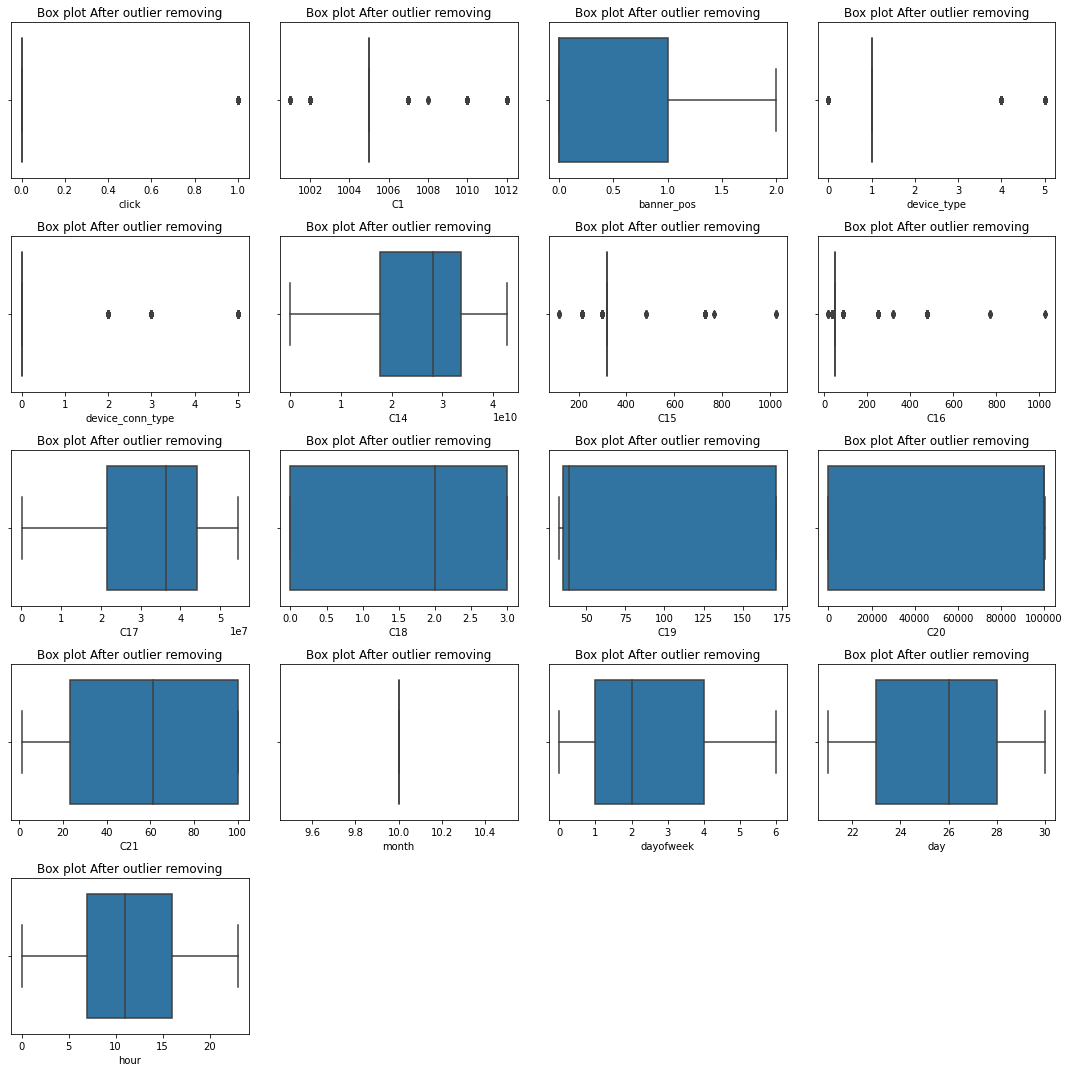

In [31]:
n = 4
plt.figure(figsize=[15,3*math.ceil(len(numerical)/n)])

for i in range(len(numerical)):
    plt.subplot(math.ceil(len(numerical)/n),n,i+1)
    sns.boxplot(train[numerical[i]])
    plt.title("Box plot After outlier removing")    

plt.tight_layout()
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

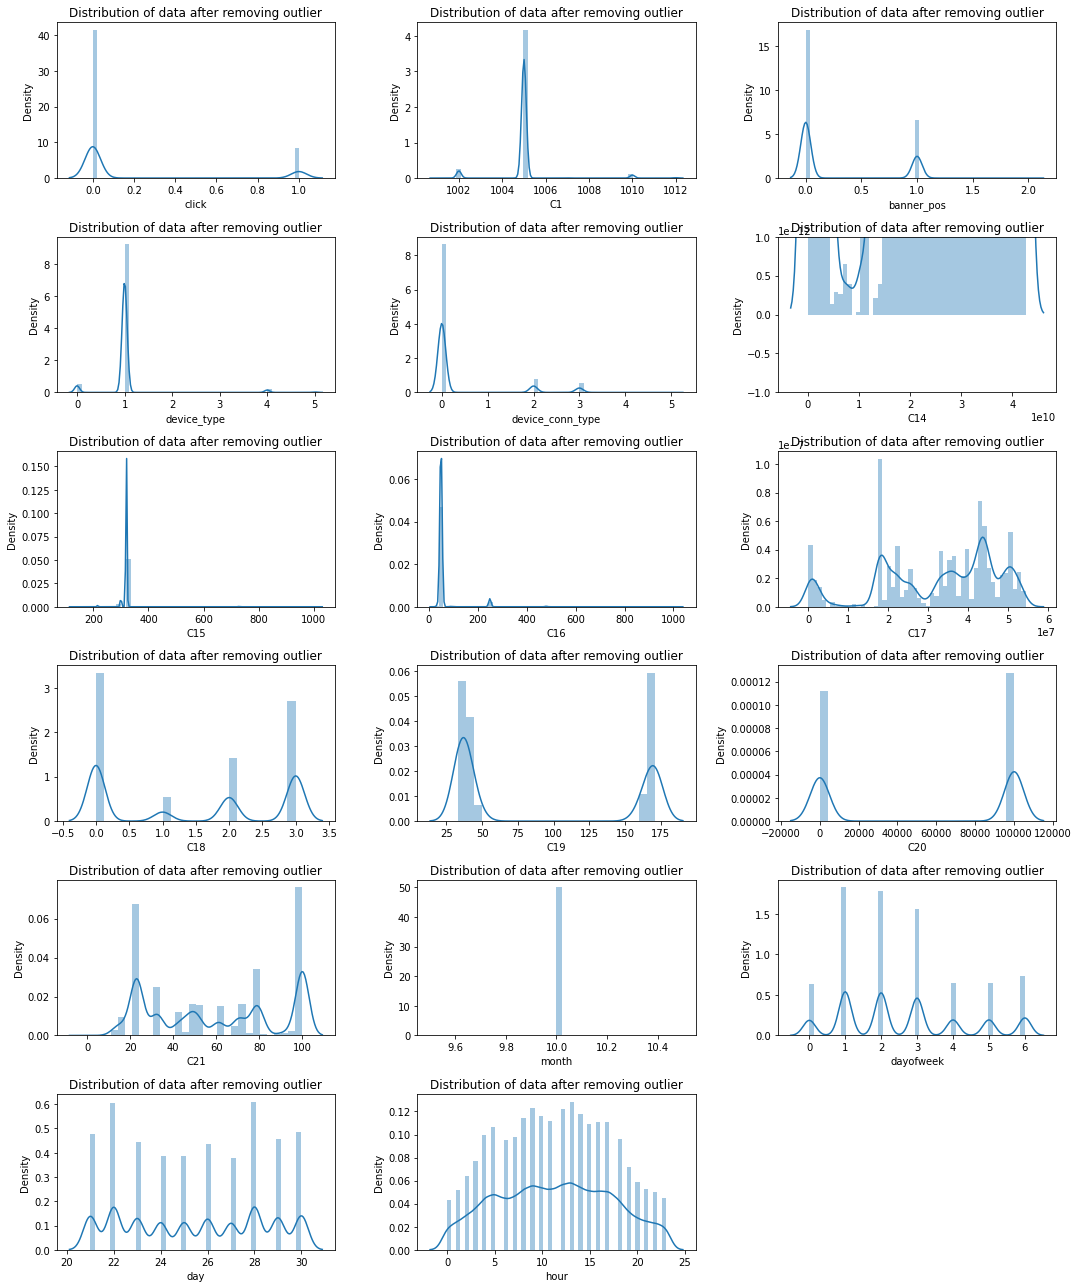

In [32]:
###After removing the outlier in numerical features
n = 3
plt.figure(figsize=[15,3*math.ceil(len(numerical)/n)])

for i in range(len(numerical)):
    plt.subplot(math.ceil(len(numerical)/n),n,i+1)
    sns.distplot(train[numerical[i]])
    plt.title("Distribution of data after removing outlier")

plt.tight_layout()
plt.show()

Text(0.5, 1.05, 'Pearson correlation of Features after outlier removing')

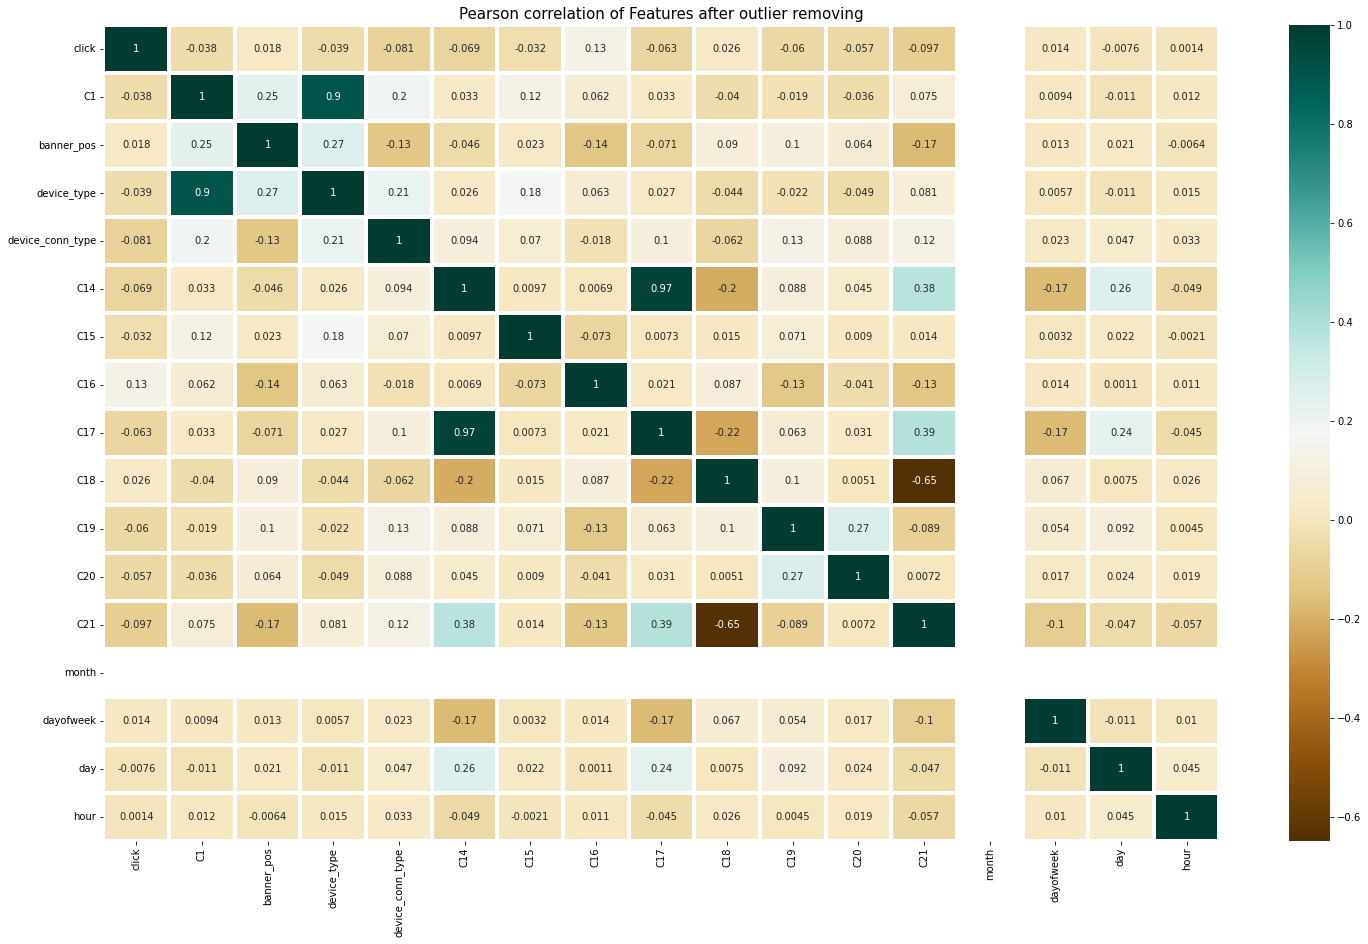

In [33]:
# Pearson correlation table to find the relationship with output with all input features. 

corr = train.corr()
f, ax = plt.subplots(figsize=(25,15))
sns.heatmap(corr, ax=ax, annot=True,linewidths=3,cmap='BrBG')
plt.title("Pearson correlation of Features after outlier removing", y=1.05, size=15)

**Observation from cooreleation matrix**


1.   month has got no significance, better to drop it
2.  C14 and C17 are highly co-related, later will remove one of them after the base model.
3.   device type with C1 are highly co-related, later will remove one of them after the base model.
4.   Removing C20 anomalised column, since it have got nearly 47% of values with -1. As a categorical variable it's not expected to have values as -1. Correlation value of this column w.r.t other column is very weak, so that also C20 column  from data set.





In [34]:
# as said above dropping columns. 

train.drop(['month', 'C20'], axis=1, inplace=True)
train.columns

Index(['click', 'C1', 'banner_pos', 'site_id', 'site_domain', 'site_category',
       'app_id', 'app_domain', 'app_category', 'device_id', 'device_ip',
       'device_model', 'device_type', 'device_conn_type', 'C14', 'C15', 'C16',
       'C17', 'C18', 'C19', 'C21', 'dayofweek', 'day', 'hour'],
      dtype='object')

####**Analysing Categorical features**

In [35]:
for col in categorical:
    print(f"unique counts of{col}:", len(train[col].unique()))
    print("----------------------")
    print(f"normalise value of {col}:\n",train[col].value_counts(normalize = True))


unique counts ofsite_id: 1485
----------------------
normalise value of site_id:
 85f751fd   0.36
1fbe01fe   0.16
e151e245   0.07
d9750ee7   0.02
5b08c53b   0.02
           ... 
27e10723   0.00
1661bb7f   0.00
1edf0277   0.00
b2cc98bb   0.00
bf991633   0.00
Name: site_id, Length: 1485, dtype: float64
unique counts ofsite_domain: 1331
----------------------
normalise value of site_domain:
 c4e18dd6   0.37
f3845767   0.16
7e091613   0.08
7687a86e   0.03
98572c79   0.02
           ... 
22f0e7fd   0.00
abb08d8f   0.00
aa3d7d72   0.00
05a2f6dd   0.00
bde22369   0.00
Name: site_domain, Length: 1331, dtype: float64
unique counts ofsite_category: 19
----------------------
normalise value of site_category:
 50e219e0   0.41
f028772b   0.31
28905ebd   0.18
3e814130   0.08
f66779e6   0.01
75fa27f6   0.00
335d28a8   0.00
76b2941d   0.00
c0dd3be3   0.00
72722551   0.00
dedf689d   0.00
70fb0e29   0.00
0569f928   0.00
8fd0aea4   0.00
a818d37a   0.00
42a36e14   0.00
e787de0e   0.00
9ccfa2ea   0.00
5378

####**Observations of Categorical feature:**




1.  All categorical variables have lot of unique values in it, one hot encoding is not a scalable approach
2.   we will go with label encoding and scaling approach is a better idea for this.




In [36]:
### taking 20% of sample of data for analysis
sampled_data = train.sample(frac=0.2, random_state=42)
X = sampled_data.drop(['click'], axis=1)
y = sampled_data['click']

0   0.83
1   0.17
Name: click, dtype: float64




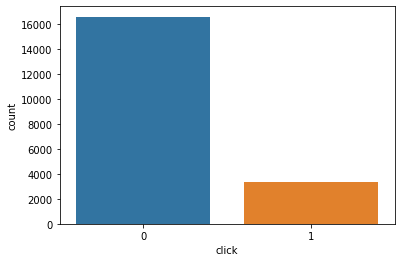

In [37]:
# After taking the sample of data, still the ratio of output remains same.

print(train.click.value_counts(normalize = True))
print("\n")
plt.figure()
sns.countplot(x=y)
plt.show()

In [38]:
##using target encoder for feature of dataset
target_encoder = ce.TargetEncoder()
X = target_encoder.fit_transform(X, y)
X.head()

,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,...,C14,C15,C16,C17,C18,C19,C21,dayofweek,day,hour
58925,1005,0,0.12,0.12,0.13,0.05,0.05,0.10,0.17,0.14,...,41718275437.00,320,50,52977147.60,3,171,100,3,30,4
20779,1005,0,0.20,0.20,0.20,0.19,0.19,0.19,0.17,0.14,...,14634033708.37,320,50,17945307.83,0,35,79,1,28,0
37487,1005,0,0.12,0.12,0.13,0.04,0.04,0.09,0.17,0.27,...,31128587005.66,320,50,40171176.41,1,161,71,3,23,13
49587,1002,0,0.25,0.30,0.13,0.19,0.19,0.19,0.27,0.27,...,25788368890.49,320,50,33809591.12,2,171,52,3,23,22
35200,1005,0,0.14,0.14,0.20,0.19,0.19,0.19,0.17,0.14,...,1522486633.94,320,50,1202882.40,3,47,23,0,27,23


In [39]:
####splitting sample data into 70% for training anf 30% for testing, this is not original data.
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size= 0.3, random_state= 42)

#####**Building basic model without featuring**
Currently, implementing basic model without feature engineering on 20% of data that means sample data



1.  in this no feature engineering is done apart from removing definate columns y,C20 and month
2.   We will run 3 models a. Logistic regression [for explainability and finding linear relationship] b. Decision tree classifier [for explainability and also for non-linear relation] c. Random forest classifier [for accuracy and improving the model]

1.   Target variable is highly imbalance, so model will be baised towards majority class. for every base model will try with both balance and imbalance data.






**Evaluation matrices method**
Defining Some method of evaluation of any algorithm, so that we can use multiple times in machine algorithm.

In [40]:
# this function helps in evaluation the given model and provide accuracy and confusion matrix. 

def model_eval(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    return accuracy, cnf_matrix

In [41]:
# Plots the ROC curve and returns false positive rate, true positive rate, and thresholds. 

def draw_roc(model, Xtest, actual):
    probs = model.predict(X_test)
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

In [42]:
# Returns the crossvalidation score for given number of n folds. 

def cross_val (model, x, y, folds):
    crossvalidation = cross_val_score(model, x, y, cv= folds, n_jobs=-1)
    return crossvalidation

In [43]:
# this stores the results in dataframe for evaluating the final result. 

def store_results(name, ytrain, xtrain, ytest, xtest, model, folds):
    
    crossvalidation = cross_val(model, xtrain, ytrain, folds)
    
    accuracy_test, cm1 =  model_eval(model, xtrain, ytrain)
    TP = cm1[1,1] # true positive 
    TN = cm1[0,0] # true negatives
    FP = cm1[0,1] # false positives
    FN = cm1[1,0] # false negatives
    recall_test = TP / (TP+FP)
    precision_test = TP / (TP+FN)
    
    accuracy_train, cm1 =  model_eval(model, xtest, ytest)
    TP = cm1[1,1] # true positive 
    TN = cm1[0,0] # true negatives
    FP = cm1[0,1] # false positives
    FN = cm1[1,0] # false negatives
    recall_train = TP / (TP+FP)
    precision_train = TP / (TP+FN)

    entry = {'Model': [name],
          'Accuracy_train': [accuracy_train],
          'recall_train': [recall_train],
          'precision_train': [precision_train],
          'Accuracy_test': [accuracy_train],
          'recall_test': [recall_train],
          'precision_test': [precision_train],
          'CrossVal_Mean': [crossvalidation.mean()],           
          'CrossVal1': [crossvalidation[0]],
          'CrossVal2': [crossvalidation[1]],
          'CrossVal3': [crossvalidation[2]],
          'CrossVal4': [crossvalidation[3]],
          'CrossVal5': [crossvalidation[4]],
          }
    result = pd.DataFrame(entry)
    return result

**Dummy classifier for verification of data**

Dummy classifier helps in baseling the model performace w.r.t dominanat class. here we are using highly dominant class for prediction

In [44]:
outcome = pd.DataFrame()
dummy_clf = DummyClassifier(strategy= "most_frequent")
dummy_clf.fit(X_train, y_train)
accuracy, cnf_matrix  = model_eval(dummy_clf, X_train, y_train)
print(accuracy)
print(cnf_matrix)
temp = store_results("Dummy classifier", y_train, X_train, y_test, X_test, dummy_clf, 5)
outcome = outcome.append(temp)
outcome

0.8334651614294959
[[11591     0]
 [ 2316     0]]


<ipython-input-43-d691d6013a72>:12: RuntimeWarning: invalid value encountered in long_scalars
  recall_test = TP / (TP+FP)
<ipython-input-43-d691d6013a72>:20: RuntimeWarning: invalid value encountered in long_scalars
  recall_train = TP / (TP+FP)


,Model,Accuracy_train,recall_train,precision_train,Accuracy_test,recall_test,precision_test,CrossVal_Mean,CrossVal1,CrossVal2,CrossVal3,CrossVal4,CrossVal5
0,Dummy classifier,0.83,NaN,0.00,0.83,NaN,0.00,0.83,0.83,0.83,0.83,0.83,0.83


**Regression Model with imbalance predictor**

In [45]:
X_train.head()

,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,...,C14,C15,C16,C17,C18,C19,C21,dayofweek,day,hour
33389,1002,0,0.12,0.12,0.13,0.14,0.19,0.19,0.14,0.19,...,2048598.27,320,50,35038.84,3,171,15,2,22,18
8299,1005,1,0.08,0.08,0.27,0.19,0.19,0.19,0.17,0.14,...,2964830579.62,320,50,2619164.96,3,171,23,2,22,5
759,1005,0,0.20,0.20,0.20,0.19,0.19,0.19,0.17,0.27,...,14636380628.13,320,50,17945307.83,0,35,79,2,22,14
11541,1005,0,0.12,0.12,0.13,0.13,0.12,0.10,0.17,0.14,...,30353952528.68,320,50,38131865.79,0,171,46,2,22,23
88765,1005,0,0.12,0.12,0.13,0.15,0.14,0.10,0.14,0.14,...,32969291779.69,320,50,43040014.21,3,167,23,2,22,11


Using Min-max scaler techinque used for distribution for dominant class 

In [46]:
scaler = MinMaxScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
X_train.head()

,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,...,C14,C15,C16,C17,C18,C19,C21,dayofweek,day,hour
33389,0.09,0.00,0.17,0.18,0.43,0.39,0.63,0.52,0.02,0.50,...,0.00,0.22,0.04,0.00,1.00,1.00,0.14,0.33,0.11,0.78
8299,0.36,0.50,0.12,0.12,0.91,0.53,0.63,0.52,0.16,0.33,...,0.07,0.22,0.04,0.05,1.00,1.00,0.22,0.33,0.11,0.22
759,0.36,0.00,0.29,0.29,0.68,0.53,0.63,0.52,0.16,0.78,...,0.34,0.22,0.04,0.33,0.00,0.01,0.79,0.33,0.11,0.61
11541,0.36,0.00,0.17,0.18,0.43,0.34,0.38,0.06,0.16,0.33,...,0.71,0.22,0.04,0.70,0.00,1.00,0.45,0.33,0.11,1.00
88765,0.36,0.00,0.17,0.18,0.43,0.41,0.46,0.06,0.02,0.33,...,0.77,0.22,0.04,0.79,1.00,0.97,0.22,0.33,0.11,0.48


logistic Regression for Imbalanced data

In [47]:
model = LogisticRegression()
model.fit(X_train, y_train)
X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])
X_test.head()

,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,...,C14,C15,C16,C17,C18,C19,C21,dayofweek,day,hour
44812,0.36,0.50,0.20,0.20,0.91,0.53,0.63,0.52,0.16,0.33,...,0.61,0.22,0.04,0.60,0.00,1.00,0.47,0.00,0.67,0.61
11323,0.36,0.00,0.17,0.18,0.43,0.03,0.05,0.06,0.16,0.33,...,0.73,0.22,0.04,0.74,0.33,0.93,0.71,0.50,0.22,0.57
47324,0.36,0.50,0.04,0.04,0.60,0.53,0.63,0.52,0.16,0.33,...,0.86,0.22,0.04,0.82,0.00,0.97,1.00,0.33,0.89,0.52
33302,0.36,0.00,0.39,0.40,0.60,0.53,0.63,0.52,0.16,0.33,...,0.78,0.22,0.04,0.81,0.00,0.01,1.00,0.33,0.11,0.39
13479,0.36,0.50,0.20,0.21,0.60,0.53,0.63,0.52,0.16,0.33,...,0.72,0.22,0.04,0.74,0.67,0.01,0.69,0.17,0.00,0.52


In [48]:
y_pred = model.predict(X_test)
accuracy, cnf_matrix = model_eval(model, X_test, y_test)
print(accuracy)
print(cnf_matrix)
temp = store_results("logistic regres - imbalance predict", y_train, X_train, y_test, X_test, model, 5)
outcome = outcome.append(temp)
outcome

0.9776883073309848
[[4927   42]
 [  91  901]]


,Model,Accuracy_train,recall_train,precision_train,Accuracy_test,recall_test,precision_test,CrossVal_Mean,CrossVal1,CrossVal2,CrossVal3,CrossVal4,CrossVal5
0,Dummy classifier,0.83,NaN,0.00,0.83,NaN,0.00,0.83,0.83,0.83,0.83,0.83,0.83
0,logistic regres - imbalance predict,0.98,0.96,0.91,0.98,0.96,0.91,0.97,0.97,0.98,0.98,0.97,0.97


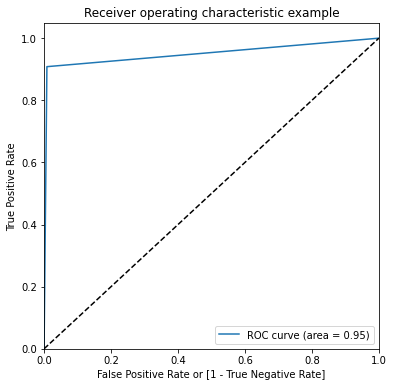

(array([0.       , 0.0084524, 1.       ]),
 array([0.        , 0.90826613, 1.        ]),
 array([2, 1, 0]))

In [49]:
draw_roc(model, X_test, y_test)

**Observation of Dummy Classifier and logistics regression**



1.  Logistic regression is behaving good with respect to dummy classifier for imbalanced dataset
2.   ROC_AUC is doing better at all



Making imbalanced data distribution into balanced data distibution by using Random sample over

Original dataset shape  Counter({0: 16560, 1: 3308})
Resampled dataset shape Counter({0: 16560, 1: 16560})


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


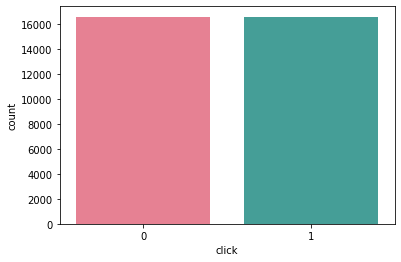

In [50]:
# x_new and y_new we will use for balanced data set for all modules
randomsample=  RandomOverSampler()
x_new, y_new = randomsample.fit_resample(X, y)

from collections import Counter
print('Original dataset shape  {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_new)))
sns.countplot(y_new, palette='husl')
plt.show()

In [51]:
X_train, X_test, y_train, y_test = train_test_split(x_new, y_new, stratify= y_new, test_size= 0.3, random_state= 42)
scaler = MinMaxScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
X_train.head()

,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,...,C14,C15,C16,C17,C18,C19,C21,dayofweek,day,hour
19161,0.36,0.00,0.17,0.18,0.43,0.55,0.65,0.06,0.16,0.33,...,0.78,0.22,0.04,0.80,0.00,0.01,1.00,0.33,0.11,0.39
24346,0.36,0.00,0.29,0.29,0.68,0.53,0.63,0.52,0.16,0.78,...,0.78,0.22,0.04,0.80,0.00,0.01,1.00,0.17,0.00,0.65
741,0.09,0.00,0.33,0.32,0.43,0.53,0.63,0.52,0.02,0.33,...,0.48,0.22,0.04,0.49,0.67,0.04,0.31,0.33,0.11,0.74
31156,0.36,0.50,0.54,0.54,0.60,0.53,0.63,0.52,0.16,0.78,...,0.79,0.22,0.04,0.82,1.00,0.01,1.00,0.50,0.22,0.22
13127,0.36,0.00,0.28,0.28,0.68,0.53,0.63,0.52,0.16,0.33,...,0.60,0.22,0.04,0.62,0.67,1.00,0.52,0.67,0.33,0.65


**Decision Tree Classifier for balanced and Imbalanced dataset**

0.5
[[4968    0]
 [4968    0]]


<ipython-input-43-d691d6013a72>:20: RuntimeWarning: invalid value encountered in long_scalars
  recall_train = TP / (TP+FP)


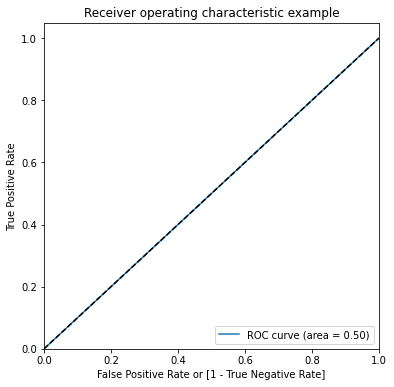

,Model,Accuracy_train,recall_train,precision_train,Accuracy_test,recall_test,precision_test,CrossVal_Mean,CrossVal1,CrossVal2,CrossVal3,CrossVal4,CrossVal5
0,Dummy classifier,0.83,NaN,0.00,0.83,NaN,0.00,0.83,0.83,0.83,0.83,0.83,0.83
0,logistic regres - imbalance predict,0.98,0.96,0.91,0.98,0.96,0.91,0.97,0.97,0.98,0.98,0.97,0.97
0,decision tree basic - imbalance predict,0.50,NaN,0.00,0.50,NaN,0.00,0.98,0.98,0.99,0.99,0.98,0.98


In [52]:
### Decision Tree classifier for imbalanced dataset
dt_basic = DecisionTreeClassifier(random_state=42)
dt_basic.fit(X_train, y_train)
y_preds = dt_basic.predict(X_test)
accuracy, cnf_matrix = model_eval(dt_basic, X_test, y_test)
print(accuracy)
print(cnf_matrix)
temp = store_results("decision tree basic - imbalance predict", y_train, X_train, y_test, X_test, dt_basic, 5)
draw_roc(dt_basic, X_test, y_test)
outcome = outcome.append(temp)
outcome

In [53]:
# x_new and y_new are already calculated before for balanced dataset using the same.

X_train, X_test, y_train, y_test = train_test_split(x_new, y_new, stratify= y_new, test_size= 0.3, random_state= 42)
X_train.head()

,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,...,C14,C15,C16,C17,C18,C19,C21,dayofweek,day,hour
19161,1005,0,0.12,0.12,0.13,0.20,0.20,0.10,0.17,0.14,...,33307330073.43,320,50,43447493.07,0,35,100,2,22,9
24346,1005,0,0.20,0.20,0.20,0.19,0.19,0.19,0.17,0.27,...,33168790384.91,320,50,43284236.27,0,35,100,1,21,15
741,1002,0,0.22,0.21,0.13,0.19,0.19,0.19,0.14,0.14,...,20330552085.00,320,50,26723459.00,2,39,32,2,22,17
31156,1005,1,0.36,0.36,0.18,0.19,0.19,0.19,0.17,0.27,...,33868866777.72,320,50,44351737.01,3,35,100,3,23,5
13127,1005,0,0.19,0.19,0.20,0.19,0.19,0.19,0.17,0.14,...,25788368890.49,320,50,33809591.12,2,171,52,4,24,15


0.9868156199677939
[[4856  112]
 [  19 4949]]


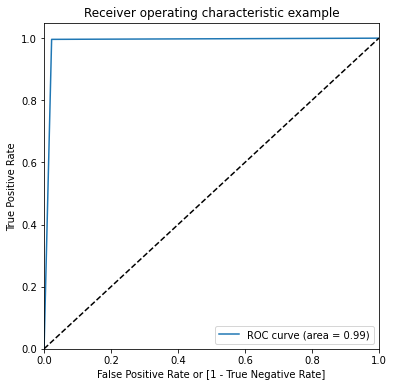

,Model,Accuracy_train,recall_train,precision_train,Accuracy_test,recall_test,precision_test,CrossVal_Mean,CrossVal1,CrossVal2,CrossVal3,CrossVal4,CrossVal5
0,Dummy classifier,0.83,NaN,0.00,0.83,NaN,0.00,0.83,0.83,0.83,0.83,0.83,0.83
0,logistic regres - imbalance predict,0.98,0.96,0.91,0.98,0.96,0.91,0.97,0.97,0.98,0.98,0.97,0.97
0,decision tree basic - imbalance predict,0.50,NaN,0.00,0.50,NaN,0.00,0.98,0.98,0.99,0.99,0.98,0.98
0,decision tree basic - balance predict,0.99,0.98,1.00,0.99,0.98,1.00,0.98,0.98,0.99,0.99,0.98,0.98


In [54]:
dt_basic = DecisionTreeClassifier(random_state=42)
dt_basic.fit(X_train, y_train)
y_preds = dt_basic.predict(X_test)
accuracy, cnf_matrix = model_eval(dt_basic, X_test, y_test)
print(accuracy)
print(cnf_matrix)
temp = store_results("decision tree basic - balance predict", y_train, X_train, y_test, X_test, dt_basic, 5)
draw_roc(dt_basic, X_test, y_test)
outcome = outcome.append(temp)
outcome

####Observation


1.   decision tree on unbalanced data isn't doing that great.
2.   decision tree on balanced data is really doing very good.

1.   decision tree on balanced data on test data as well as cross validation is doing really well.
2.   ROC_AUC curve looks really good.





**Random Forest Classifier for balanced and imbalanced dataset**

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size= 0.3, random_state= 42)
X_train.head()

,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,...,C14,C15,C16,C17,C18,C19,C21,dayofweek,day,hour
33389,1002,0,0.12,0.12,0.13,0.14,0.19,0.19,0.14,0.19,...,2048598.27,320,50,35038.84,3,171,15,2,22,18
8299,1005,1,0.08,0.08,0.27,0.19,0.19,0.19,0.17,0.14,...,2964830579.62,320,50,2619164.96,3,171,23,2,22,5
759,1005,0,0.20,0.20,0.20,0.19,0.19,0.19,0.17,0.27,...,14636380628.13,320,50,17945307.83,0,35,79,2,22,14
11541,1005,0,0.12,0.12,0.13,0.13,0.12,0.10,0.17,0.14,...,30353952528.68,320,50,38131865.79,0,171,46,2,22,23
88765,1005,0,0.12,0.12,0.13,0.15,0.14,0.10,0.14,0.14,...,32969291779.69,320,50,43040014.21,3,167,23,2,22,11


0.9793658782083543
[[4948   21]
 [ 102  890]]


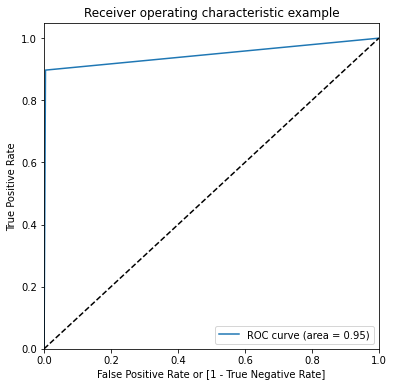

,Model,Accuracy_train,recall_train,precision_train,Accuracy_test,recall_test,precision_test,CrossVal_Mean,CrossVal1,CrossVal2,CrossVal3,CrossVal4,CrossVal5
0,Dummy classifier,0.83,NaN,0.00,0.83,NaN,0.00,0.83,0.83,0.83,0.83,0.83,0.83
0,logistic regres - imbalance predict,0.98,0.96,0.91,0.98,0.96,0.91,0.97,0.97,0.98,0.98,0.97,0.97
0,decision tree basic - imbalance predict,0.50,NaN,0.00,0.50,NaN,0.00,0.98,0.98,0.99,0.99,0.98,0.98
0,decision tree basic - balance predict,0.99,0.98,1.00,0.99,0.98,1.00,0.98,0.98,0.99,0.99,0.98,0.98
0,Random forest basic - imbalance predict,0.98,0.98,0.90,0.98,0.98,0.90,0.97,0.97,0.98,0.98,0.97,0.97


In [56]:
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)
y_preds = model_rf.predict(X_test)
accuracy, cnf_matrix = model_eval(model_rf, X_test, y_test)
print(accuracy)
print(cnf_matrix)
temp = store_results("Random forest basic - imbalance predict", y_train, X_train, y_test, X_test, model_rf, 5)
draw_roc(model_rf, X_test, y_test)
outcome = outcome.append(temp)
outcome

In [57]:
X_train, X_test, y_train, y_test = train_test_split(x_new, y_new, stratify= y_new, test_size= 0.3, random_state= 42)
X_train.head(5)

,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,...,C14,C15,C16,C17,C18,C19,C21,dayofweek,day,hour
19161,1005,0,0.12,0.12,0.13,0.20,0.20,0.10,0.17,0.14,...,33307330073.43,320,50,43447493.07,0,35,100,2,22,9
24346,1005,0,0.20,0.20,0.20,0.19,0.19,0.19,0.17,0.27,...,33168790384.91,320,50,43284236.27,0,35,100,1,21,15
741,1002,0,0.22,0.21,0.13,0.19,0.19,0.19,0.14,0.14,...,20330552085.00,320,50,26723459.00,2,39,32,2,22,17
31156,1005,1,0.36,0.36,0.18,0.19,0.19,0.19,0.17,0.27,...,33868866777.72,320,50,44351737.01,3,35,100,3,23,5
13127,1005,0,0.19,0.19,0.20,0.19,0.19,0.19,0.17,0.14,...,25788368890.49,320,50,33809591.12,2,171,52,4,24,15


0.9883252818035426
[[4864  104]
 [  12 4956]]


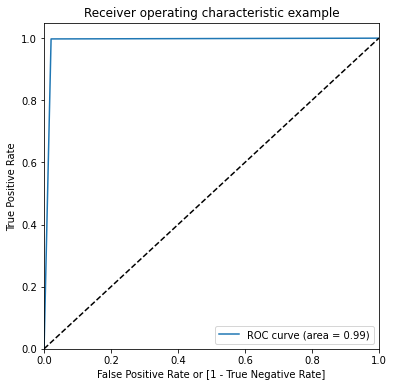

,Model,Accuracy_train,recall_train,precision_train,Accuracy_test,recall_test,precision_test,CrossVal_Mean,CrossVal1,CrossVal2,CrossVal3,CrossVal4,CrossVal5
0,Dummy classifier,0.83,NaN,0.00,0.83,NaN,0.00,0.83,0.83,0.83,0.83,0.83,0.83
0,logistic regres - imbalance predict,0.98,0.96,0.91,0.98,0.96,0.91,0.97,0.97,0.98,0.98,0.97,0.97
0,decision tree basic - imbalance predict,0.50,NaN,0.00,0.50,NaN,0.00,0.98,0.98,0.99,0.99,0.98,0.98
0,decision tree basic - balance predict,0.99,0.98,1.00,0.99,0.98,1.00,0.98,0.98,0.99,0.99,0.98,0.98
0,Random forest basic - imbalance predict,0.98,0.98,0.90,0.98,0.98,0.90,0.97,0.97,0.98,0.98,0.97,0.97
0,Random forest basic - balance predict,0.99,0.98,1.00,0.99,0.98,1.00,0.99,0.98,0.99,0.98,0.98,0.98


In [58]:
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)
y_preds = model_rf.predict(X_test)
accuracy, cnf_matrix = model_eval(model_rf, X_test, y_test)
print(accuracy)
print(cnf_matrix)
temp = store_results("Random forest basic - balance predict", y_train, X_train, y_test, X_test, model_rf, 5)
draw_roc(model_rf, X_test, y_test)
outcome = outcome.append(temp)
outcome

**Observations:**


1.   Random forest with balanced data and imbalanced dataset set is performing the best so far on both train and test data.
2.   Random forest with balanced data holding good for cross validation as well. Conclusion based on simple models built :- Random forest and decision tree on balanced data set is the best model built


####**Feature Engineering**

Above we can seen that, without feature enginnering getting good model for predictions with cross validations of 20% of data. Random Forest and decision tree are good machine learning Algorithm for this dataset. 

I am also planning to do feature enginnering for this dataset. It might be help for machine learning model.

In [59]:
feature_data=sampled_data.copy()
feature_data.shape

(19868, 24)

Text(0.5, 1.05, 'Pearson correlation of Features before feature engineering')

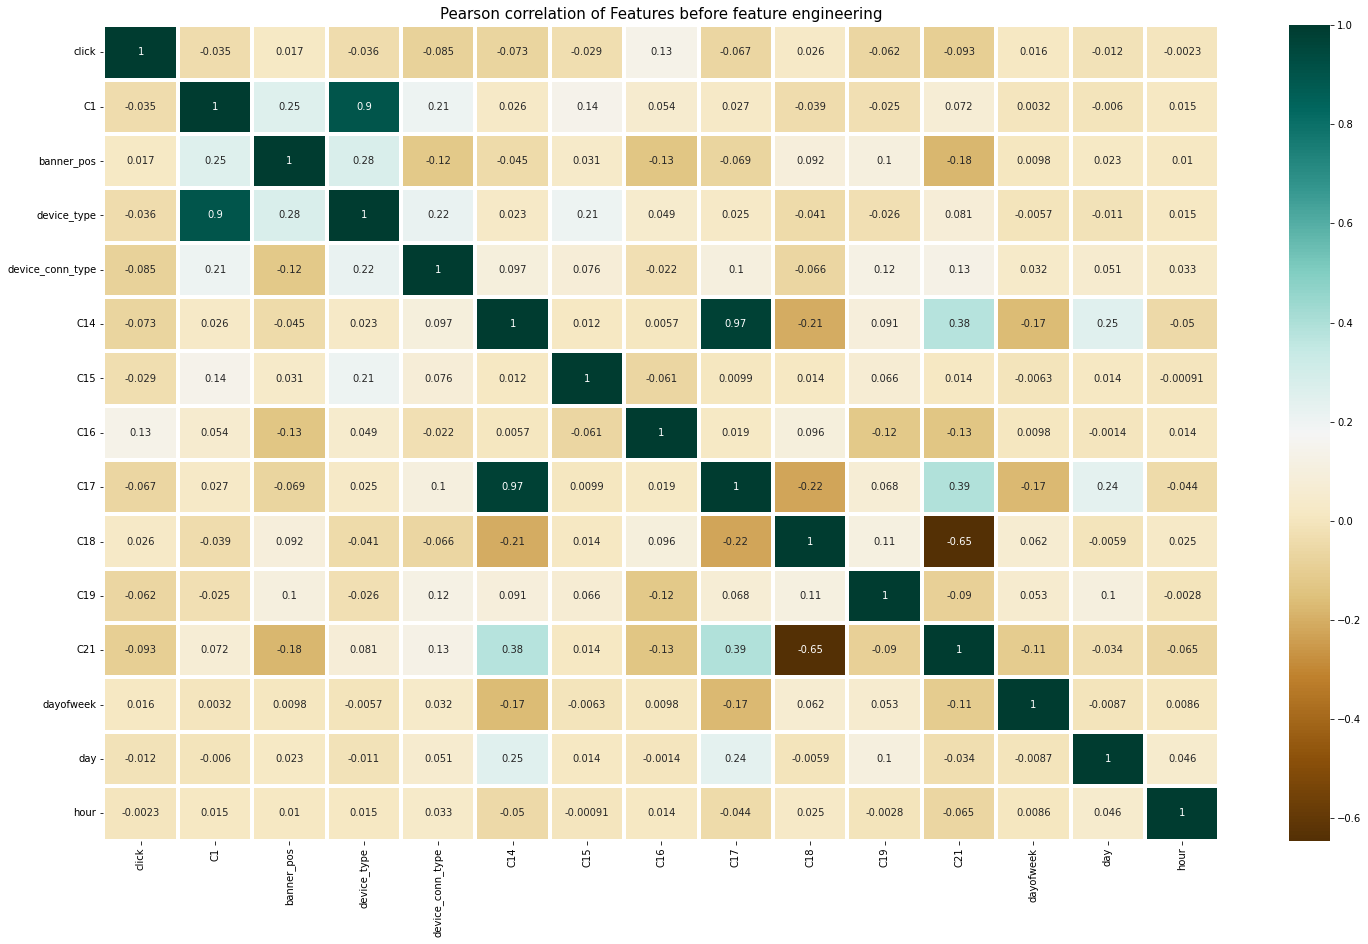

In [60]:
corr = feature_data.corr()
f, ax = plt.subplots(figsize=(25,15))
sns.heatmap(corr, ax=ax, annot=True,linewidths=3,cmap='BrBG')
plt.title("Pearson correlation of Features before feature engineering", y=1.05, size=15)

In [61]:
# C1 and device_type are highly corelated, since C1 is anomalised column we can drop it.
# C14 and C17 are highly co-related, dropping either is a good idea.

feature_data.drop(['C14', 'C1'], axis=1, inplace= True)

In [62]:
X = feature_data.drop(['click'], axis=1)
y = feature_data['click']

In [63]:
target_encoder = ce.TargetEncoder()
X = target_encoder.fit_transform(X, y)

In [64]:
X_train, X_test, y_train, y_test = train_test_split(x_new, y_new, stratify= y_new, test_size= 0.3, random_state= 42)

**Logistic regression model with feature engineering**

In [65]:
scaler = MinMaxScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
X_train.head()

,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,...,C14,C15,C16,C17,C18,C19,C21,dayofweek,day,hour
19161,0.36,0.00,0.17,0.18,0.43,0.55,0.65,0.06,0.16,0.33,...,0.78,0.22,0.04,0.80,0.00,0.01,1.00,0.33,0.11,0.39
24346,0.36,0.00,0.29,0.29,0.68,0.53,0.63,0.52,0.16,0.78,...,0.78,0.22,0.04,0.80,0.00,0.01,1.00,0.17,0.00,0.65
741,0.09,0.00,0.33,0.32,0.43,0.53,0.63,0.52,0.02,0.33,...,0.48,0.22,0.04,0.49,0.67,0.04,0.31,0.33,0.11,0.74
31156,0.36,0.50,0.54,0.54,0.60,0.53,0.63,0.52,0.16,0.78,...,0.79,0.22,0.04,0.82,1.00,0.01,1.00,0.50,0.22,0.22
13127,0.36,0.00,0.28,0.28,0.68,0.53,0.63,0.52,0.16,0.33,...,0.60,0.22,0.04,0.62,0.67,1.00,0.52,0.67,0.33,0.65


In [66]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  click   No. Observations:                23184
Model:                            GLM   Df Residuals:                    23160
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2488.2
Date:                Sun, 12 Feb 2023   Deviance:                       4976.5
Time:                        12:55:01   Pearson chi2:                 2.93e+05
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -15.9342      0.772    -20.643      0.000     -17.447     -14.421
C1                   3.1689      0.886      3.576      0.000       1.432       4.906
banner_pos           0.3313      0.208      1.591      0.112      -0.077       0.739
site_id            -12.1305      0.964    -12.586      0.000     -14.020     -10.241
site_domain         15.7022      0.993     15.807      0.000      13.755      17.649
site_category        1.0634      0.437      2.435      0.015       0.208       1.919
app_id               1.9147      0.554      3.457      0.001       0.829       3.000
app_domain          -1.5337      0.551     -2.782      0.005      -2.614      -0.453
app_category        -0.0485      0.366     -0.132      0.895      -0.766       0.669
device_id           12.8345      1.322      9.708      0.000      10.243      15.426
device_ip           18.6363      0.290     64.248      0.000      18.068      19.205
device_model         2.7329      0.298      9.157      0.000       2.148       3.318
device_type         -2.0895      1.308     -1.598      0.110      -4.652       0.473
device_conn_type    -0.2458      0.391     -0.629      0.529      -1.012       0.520
C14                 -0.8662      0.918     -0.943      0.345      -2.666       0.933
C15                  2.2368      2.312      0.968      0.333      -2.294       6.767
C16                 -2.4322      0.730     -3.332      0.001      -3.863      -1.002
C17                  0.3152      0.870      0.362      0.717      -1.390       2.020
C18                 -0.1180      0.144     -0.817      0.414      -0.401       0.165
C19                  0.0202      0.100      0.203      0.839      -0.175       0.216
C21                  0.2709      0.216      1.252      0.211      -0.153       0.695
dayofweek            0.6315      0.137      4.617      0.000       0.363       0.900
day                  0.0461      0.133      0.346      0.730      -0.215       0.307
hour                 0.0533      0.152      0.351      0.726      -0.245       0.351
====================================================================================
"""

In [67]:
y_train_pred = res.predict(X_train_sm)
y_train_pred_final = pd.DataFrame({'y':y_train, 'y_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.y_Prob.map(lambda x: 1 if x > 0.5 else 0)
confusion = metrics.confusion_matrix(y_train_pred_final.y, y_train_pred_final.predicted )
print(confusion)
print(metrics.accuracy_score(y_train_pred_final.y, y_train_pred_final.predicted))

[[11185   407]
 [  479 11113]]
0.961783988957902


In [68]:
def sm_model_evaluation (model, x_test, y_test):
    '''
    model = sm model
    y_test = series of labels 
    columns = list of columns in features
    x_test = test dataframe 
    '''
    X_sm = sm.add_constant(x_test)
    y_pred = res.predict(X_sm)
    y_train_pred_final = pd.DataFrame({'y':y_test, 'y_Prob':y_pred})
    y_train_pred_final['predicted'] = y_train_pred_final.y_Prob.map(lambda x: 1 if x > 0.5 else 0)
    # Let's check the overall accuracy.
    print(metrics.accuracy_score(y_train_pred_final.y, y_train_pred_final.predicted))
    confusion = metrics.confusion_matrix(y_train_pred_final.y, y_train_pred_final.predicted )
    print(confusion)

In [69]:
X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])
sm_model_evaluation(res, X_test, y_test)  

0.9625603864734299
[[4798  170]
 [ 202 4766]]


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [70]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,187.90
14,C14,23.65
17,C17,23.47
3,site_id,16.90
4,site_domain,16.55
12,device_type,5.57
1,C1,5.39
6,app_id,3.06
8,app_category,2.68
7,app_domain,2.51


In [71]:
X_train_sm.drop(['dayofweek','C15','hour','day'], axis=1, inplace= True)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  click   No. Observations:                23184
Model:                            GLM   Df Residuals:                    23164
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2499.5
Date:                Sun, 12 Feb 2023   Deviance:                       4998.9
Time:                        12:55:03   Pearson chi2:                 3.16e+05
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -14.9079      0.529    -28.172      0.000     -15.945     -13.871
C1                   3.2778      0.848      3.864      0.000       1.615       4.940
banner_pos           0.2939      0.206      1.424      0.154      -0.111       0.698
site_id            -12.0549      0.955    -12.619      0.000     -13.927     -10.183
site_domain         15.5903      0.985     15.834      0.000      13.660      17.520
site_category        1.0931      0.432      2.531      0.011       0.247       1.940
app_id               1.8698      0.551      3.391      0.001       0.789       2.951
app_domain          -1.6299      0.550     -2.963      0.003      -2.708      -0.552
app_category         0.0752      0.363      0.207      0.836      -0.637       0.788
device_id           12.8218      1.326      9.672      0.000      10.223      15.420
device_ip           18.5726      0.289     64.315      0.000      18.007      19.139
device_model         2.6594      0.297      8.964      0.000       2.078       3.241
device_type         -2.1504      1.287     -1.671      0.095      -4.672       0.371
device_conn_type    -0.2108      0.391     -0.540      0.590      -0.977       0.555
C14                 -0.9334      0.921     -1.014      0.311      -2.738       0.871
C16                 -2.5537      0.721     -3.542      0.000      -3.967      -1.141
C17                  0.2700      0.875      0.309      0.758      -1.445       1.985
C18                 -0.1446      0.145     -0.999      0.318      -0.428       0.139
C19                  0.0322      0.099      0.325      0.745      -0.162       0.227
C21                  0.1733      0.212      0.819      0.413      -0.242       0.588
====================================================================================
"""

In [72]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,96.19
16,C17,23.38
14,C14,23.33
3,site_id,16.89
4,site_domain,16.51
1,C1,5.33
12,device_type,5.33
6,app_id,3.05
8,app_category,2.67
7,app_domain,2.49


In [73]:
y_train_pred = res.predict(X_train_sm)
y_train_pred_final = pd.DataFrame({'y':y_train, 'y_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.y_Prob.map(lambda x: 1 if x > 0.5 else 0)
confusion = metrics.confusion_matrix(y_train_pred_final.y, y_train_pred_final.predicted )
print(confusion)
print(metrics.accuracy_score(y_train_pred_final.y, y_train_pred_final.predicted))

[[11183   409]
 [  471 11121]]
0.9620427881297446


In [74]:
col = list(X_train_sm.columns)
col.remove('const')
sm_model_evaluation(res, X_test[col], y_test)  

0.9626610305958132
[[4797  171]
 [ 200 4768]]


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [75]:
numbers = [float(x)/20 for x in range(20)]
print(numbers)
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.y_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

[0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]


,y,y_Prob,predicted,0.0,0.05,0.1,0.15,0.2,0.25,0.3,...,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95
19161,0,0.01,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24346,1,0.99,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
741,0,0.00,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31156,1,1.00,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
13127,0,0.08,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
cutoff_df = pd.DataFrame( columns = ['Thresold_prob','accuracy','recall','precision'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.y, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    TP = cm1[1,1] # true positive 
    TN = cm1[0,0] # true negatives
    FP = cm1[0,1] # false positives
    FN = cm1[1,0] # false negatives
    accuracy = (TP + TN)/total1
    
    recall = TP / (TP+FP)
    precision = TP / (TP+FN)
    cutoff_df.loc[i] =[ i ,accuracy,recall,precision]
cutoff_df

,Thresold_prob,accuracy,recall,precision
0.00,0.00,0.50,0.50,1.00
0.05,0.05,0.91,0.85,0.99
0.10,0.10,0.96,0.93,0.99
0.15,0.15,0.96,0.94,0.98
0.20,0.20,0.96,0.95,0.98
0.25,0.25,0.96,0.95,0.98
0.30,0.30,0.96,0.95,0.97
0.35,0.35,0.96,0.96,0.97
0.40,0.40,0.96,0.96,0.97
0.45,0.45,0.96,0.96,0.96


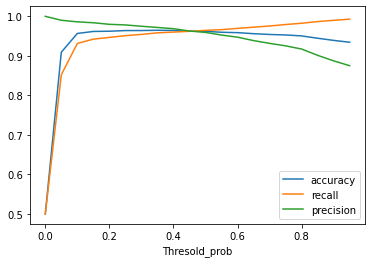

In [77]:
cutoff_df.plot.line(x='Thresold_prob', y=['accuracy','recall','precision'])
plt.show()

In [78]:
y_train_pred_final['final_predicted'] = y_train_pred_final.y_Prob.map( lambda x: 1 if x > 0.50 else 0)
y_train_pred_final.head()

,y,y_Prob,predicted,0.0,0.05,0.1,0.15,0.2,0.25,0.3,...,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,final_predicted
19161,0,0.01,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24346,1,0.99,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
741,0,0.00,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31156,1,1.00,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
13127,0,0.08,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
X_train_sm.drop('const', axis= 1, inplace= True)
X_test = X_test[X_train_sm.columns]
print(X_train_sm.shape)
print(X_test.shape)

(23184, 19)
(9936, 19)


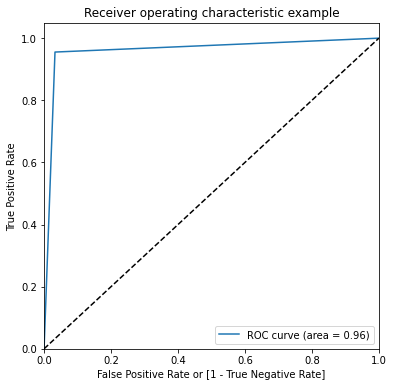

,Model,Accuracy_train,recall_train,precision_train,Accuracy_test,recall_test,precision_test,CrossVal_Mean,CrossVal1,CrossVal2,CrossVal3,CrossVal4,CrossVal5
0,Dummy classifier,0.83,NaN,0.00,0.83,NaN,0.00,0.83,0.83,0.83,0.83,0.83,0.83
0,logistic regres - imbalance predict,0.98,0.96,0.91,0.98,0.96,0.91,0.97,0.97,0.98,0.98,0.97,0.97
0,decision tree basic - imbalance predict,0.50,NaN,0.00,0.50,NaN,0.00,0.98,0.98,0.99,0.99,0.98,0.98
0,decision tree basic - balance predict,0.99,0.98,1.00,0.99,0.98,1.00,0.98,0.98,0.99,0.99,0.98,0.98
0,Random forest basic - imbalance predict,0.98,0.98,0.90,0.98,0.98,0.90,0.97,0.97,0.98,0.98,0.97,0.97
0,Random forest basic - balance predict,0.99,0.98,1.00,0.99,0.98,1.00,0.99,0.98,0.99,0.98,0.98,0.98
0,logistic reg with feature engine,0.96,0.97,0.96,0.96,0.97,0.96,0.96,0.96,0.97,0.96,0.96,0.96


In [80]:
model = LogisticRegression()
model.fit(X_train_sm, y_train)
accuracy, cnf_matrix = model_eval(model, X_test[X_train_sm.columns], y_test)
temp = store_results("logistic reg with feature engine", y_train, X_train_sm, y_test, X_test[X_train_sm.columns], \
                     model, 5)
draw_roc(model, X_test[X_train_sm.columns], y_test)
outcome = outcome.append(temp)
outcome

**Decision tree model with feature engineering**

In [81]:
X_train, X_test, y_train, y_test = train_test_split(x_new, y_new, stratify= y_new, test_size= 0.3, random_state= 42)

In [82]:
dt_tree = DecisionTreeClassifier(random_state=42)
dt_tree.fit(X_train, y_train)
feature_importances = dt_tree.feature_importances_
features = X_train.columns
df = pd.DataFrame({'features': features, 'importance': feature_importances})
df.sort_values(by='importance', ascending = False)

,features,importance
9,device_ip,0.91
10,device_model,0.02
22,hour,0.02
13,C14,0.01
8,device_id,0.01
20,dayofweek,0.01
21,day,0.01
19,C21,0.00
2,site_id,0.00
18,C19,0.00


In [83]:
df = df[df.importance >=0.01]
rf_cols = []
for col in list(X_train.columns):
    if col in list(df.features):
        rf_cols.append(col)

In [84]:

dt_tree = DecisionTreeClassifier(random_state=42)
dt_tree.fit(X_train[rf_cols], y_train)

DecisionTreeClassifier(random_state=42)

['device_ip', 'device_model', 'C14', 'hour']
4
Train results
accuracy 0.9997843340234644
cnf_matrix 
 [[11587     5]
 [    0 11592]]
Test results
accuracy 0.9879227053140096
cnf_matrix 
 [[4863  105]
 [  15 4953]]


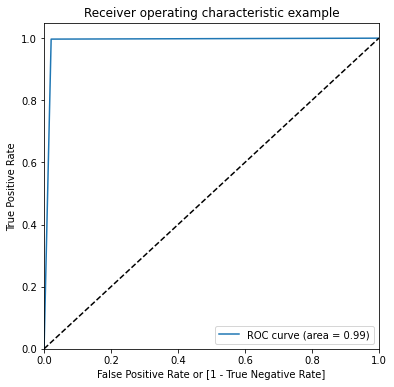

(array([0.        , 0.02113527, 1.        ]),
 array([0.        , 0.99698068, 1.        ]),
 array([2, 1, 0]))

In [85]:
print(rf_cols)
X_train = X_train[rf_cols]
X_test = X_test[rf_cols]
print(len(rf_cols))
predict_rf = dt_tree.predict(X_train)
predict_rf_test = dt_tree.predict(X_test)

accuracy, cnf_matrix = model_eval(dt_tree, X_train, y_train)
print("Train results")
print("accuracy",accuracy)
print("cnf_matrix \n",cnf_matrix)

accuracy, cnf_matrix = model_eval(dt_tree, X_test, y_test)
print("Test results")
print("accuracy",accuracy)
print("cnf_matrix \n",cnf_matrix)

draw_roc(dt_tree, X_test, y_test)

it's seems like that, model is not overfitting and underfitting

In [86]:
temp = store_results("Decision tree with feature engine", y_train, X_train, y_test, X_test, \
                     dt_tree, 5)
outcome = outcome.append(temp)

In [87]:

outcome

,Model,Accuracy_train,recall_train,precision_train,Accuracy_test,recall_test,precision_test,CrossVal_Mean,CrossVal1,CrossVal2,CrossVal3,CrossVal4,CrossVal5
0,Dummy classifier,0.83,NaN,0.00,0.83,NaN,0.00,0.83,0.83,0.83,0.83,0.83,0.83
0,logistic regres - imbalance predict,0.98,0.96,0.91,0.98,0.96,0.91,0.97,0.97,0.98,0.98,0.97,0.97
0,decision tree basic - imbalance predict,0.50,NaN,0.00,0.50,NaN,0.00,0.98,0.98,0.99,0.99,0.98,0.98
0,decision tree basic - balance predict,0.99,0.98,1.00,0.99,0.98,1.00,0.98,0.98,0.99,0.99,0.98,0.98
0,Random forest basic - imbalance predict,0.98,0.98,0.90,0.98,0.98,0.90,0.97,0.97,0.98,0.98,0.97,0.97
0,Random forest basic - balance predict,0.99,0.98,1.00,0.99,0.98,1.00,0.99,0.98,0.99,0.98,0.98,0.98
0,logistic reg with feature engine,0.96,0.97,0.96,0.96,0.97,0.96,0.96,0.96,0.97,0.96,0.96,0.96
0,Decision tree with feature engine,0.99,0.98,1.00,0.99,0.98,1.00,0.98,0.99,0.98,0.98,0.98,0.98


**Random forest model with feature engineering**

In [88]:
X_train, X_test, y_train, y_test = train_test_split(x_new, y_new, stratify= y_new, test_size= 0.3, random_state= 42)

In [89]:
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)
feature_importances = model_rf.feature_importances_
features = X_train.columns
df = pd.DataFrame({'features': features, 'importance': feature_importances})
df.sort_values(by='importance', ascending = False)

,features,importance
9,device_ip,0.71
10,device_model,0.06
8,device_id,0.06
2,site_id,0.03
3,site_domain,0.02
22,hour,0.02
5,app_id,0.02
13,C14,0.02
21,day,0.01
16,C17,0.01


['site_id', 'site_domain', 'app_id', 'device_id', 'device_ip', 'device_model', 'C14', 'hour']
8
Train results
accuracy 0.9997843340234644
cnf_matrix 
 [[11587     5]
 [    0 11592]]
Test results
accuracy 0.9883252818035426
cnf_matrix 
 [[4872   96]
 [  20 4948]]


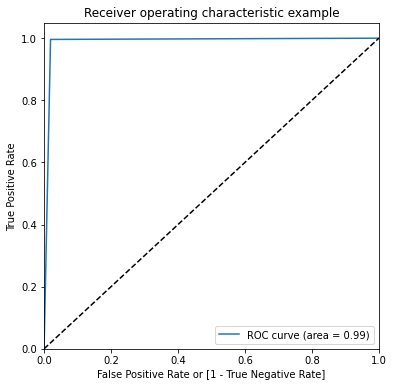

(array([0.        , 0.01932367, 1.        ]),
 array([0.        , 0.99597424, 1.        ]),
 array([2, 1, 0]))

In [90]:
df = df[df.importance > 0.01]
rf_cols = []
for col in list(X_train.columns):
    if col in list(df.features):
        rf_cols.append(col)
        
X_train = X_train[rf_cols]
X_test = X_test[rf_cols]

model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)
print(rf_cols)

print(len(rf_cols))
predict_rf = model_rf.predict(X_train)
predict_rf_test = model_rf.predict(X_test)

accuracy, cnf_matrix = model_eval(model_rf, X_train, y_train)
print("Train results")
print("accuracy",accuracy)
print("cnf_matrix \n", cnf_matrix)

accuracy, cnf_matrix = model_eval(model_rf, X_test, y_test)
print("Test results")
print("accuracy",accuracy)
print("cnf_matrix \n", cnf_matrix)

draw_roc(model_rf, X_test, y_test)

In [91]:
temp = store_results("Random Forest with feature engine", y_train, X_train, y_test, X_test, \
                     model_rf, 5)
outcome = outcome.append(temp)

In [92]:
outcome.reset_index(drop=True, inplace=True)
outcome

,Model,Accuracy_train,recall_train,precision_train,Accuracy_test,recall_test,precision_test,CrossVal_Mean,CrossVal1,CrossVal2,CrossVal3,CrossVal4,CrossVal5
0,Dummy classifier,0.83,NaN,0.00,0.83,NaN,0.00,0.83,0.83,0.83,0.83,0.83,0.83
1,logistic regres - imbalance predict,0.98,0.96,0.91,0.98,0.96,0.91,0.97,0.97,0.98,0.98,0.97,0.97
2,decision tree basic - imbalance predict,0.50,NaN,0.00,0.50,NaN,0.00,0.98,0.98,0.99,0.99,0.98,0.98
3,decision tree basic - balance predict,0.99,0.98,1.00,0.99,0.98,1.00,0.98,0.98,0.99,0.99,0.98,0.98
4,Random forest basic - imbalance predict,0.98,0.98,0.90,0.98,0.98,0.90,0.97,0.97,0.98,0.98,0.97,0.97
5,Random forest basic - balance predict,0.99,0.98,1.00,0.99,0.98,1.00,0.99,0.98,0.99,0.98,0.98,0.98
6,logistic reg with feature engine,0.96,0.97,0.96,0.96,0.97,0.96,0.96,0.96,0.97,0.96,0.96,0.96
7,Decision tree with feature engine,0.99,0.98,1.00,0.99,0.98,1.00,0.98,0.99,0.98,0.98,0.98,0.98
8,Random Forest with feature engine,0.99,0.98,1.00,0.99,0.98,1.00,0.99,0.98,0.99,0.99,0.98,0.98


####**Conclusion:**

If we have to select one model, Random forest classifier  and decision tree with feature enginnering  looks promising and best. although after the feature engineering the training and test results looks same as before feature engineering, but model is very robust with new features and rightly fitted for both training and test dataset. logistic regression classifer seems to have low accuracy, precision, and recall, overall random forest classifier  and decision tree classifier seems doing better with all aspects.

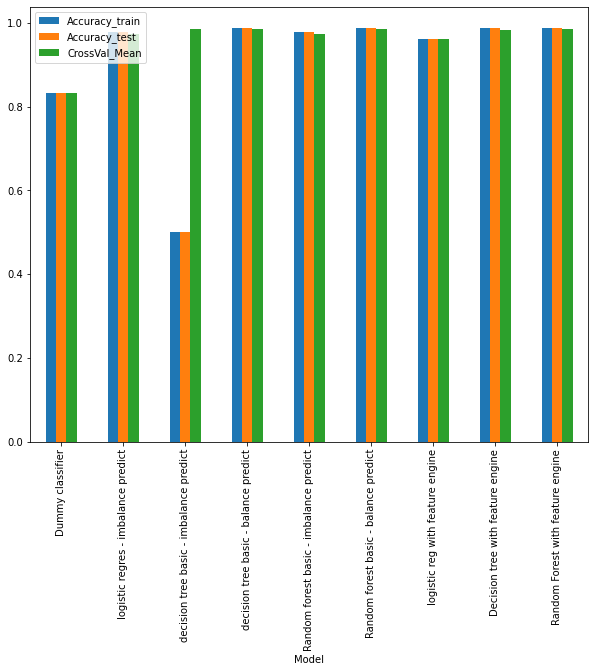

In [93]:
plt.rcParams["figure.figsize"] = (10,8)
outcome.plot(x='Model', y=['Accuracy_train','Accuracy_test','CrossVal_Mean'], kind="bar")
plt.xticks(rotation=90)
plt.show()